In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import tree
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing


import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

from scipy.stats import poisson
#t student
from scipy.stats import t

#Regressão Linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import datasets, linear_model

#RNA
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("dataset.csv",encoding="UTF-8", sep=",")

In [3]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [5]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [6]:
#estrutura do dataset
data.shape

(300153, 11)

In [7]:
#colunas do dataset
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
#informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 18.3 MB


In [9]:
#contagem de valores da coluna Airline
data.airline.value_counts(normalize=True)

5    0.425979
1    0.269503
3    0.143660
2    0.077204
0    0.053633
4    0.030021
Name: airline, dtype: float64

In [10]:
#Estatísticas da coluna price
mean1 = data['price'].mean()
sum1 = data['price'].sum()
max1 = data['price'].max()
min1 = data['price'].min()
count1 = data['price'].count()
median1 = data['price'].median() 
std1 = data['price'].std() 
var1 = data['price'].var()

In [11]:
print("Media: %.1f"%(mean1))
print("Soma: %.1f"%(sum1))
print("Maximo: %.1f"%(max1))
print("Minimo: %.1f"%(min1))
print("Contagem: %.1f"%(count1))
print("Mediana: %.1f"%(median1))
print("Desvio-Padrao: %.1f"%(std1))
print("Variancia: %.1f"%(var1))

Media: 20889.7
Soma: 6270094275.0
Maximo: 123071.0
Minimo: 1105.0
Contagem: 300153.0
Mediana: 7425.0
Desvio-Padrao: 22697.8
Variancia: 515188643.4


<AxesSubplot:xlabel='price'>

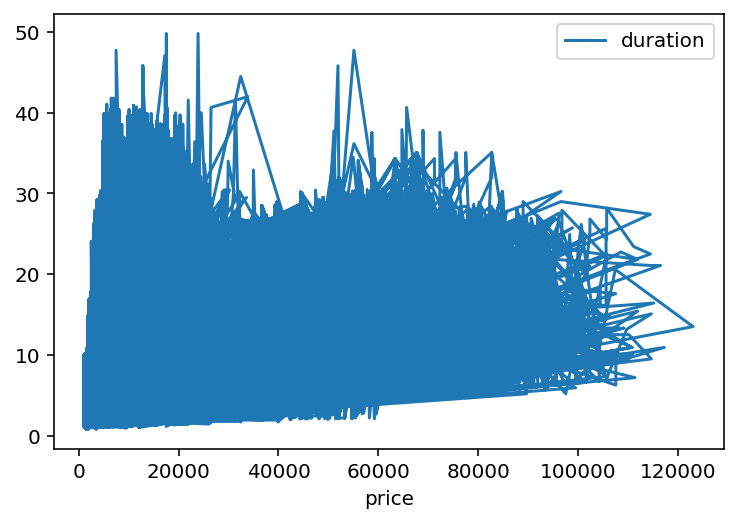

In [12]:
#Gráfico comparção de preço com duração
data.plot("price", "duration")

<AxesSubplot:xlabel='price', ylabel='duration'>

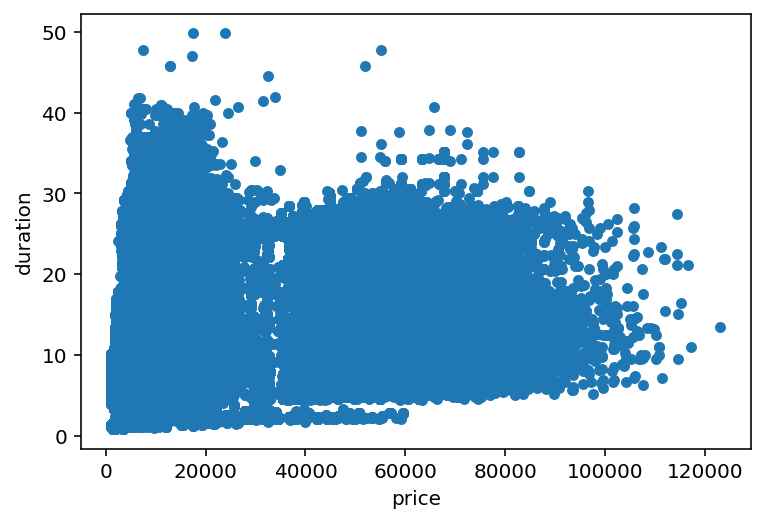

In [36]:
#Scatterplot matrix plot
data.plot(kind='scatter',x='price',y='duration')

<AxesSubplot:xlabel='duration', ylabel='stops'>

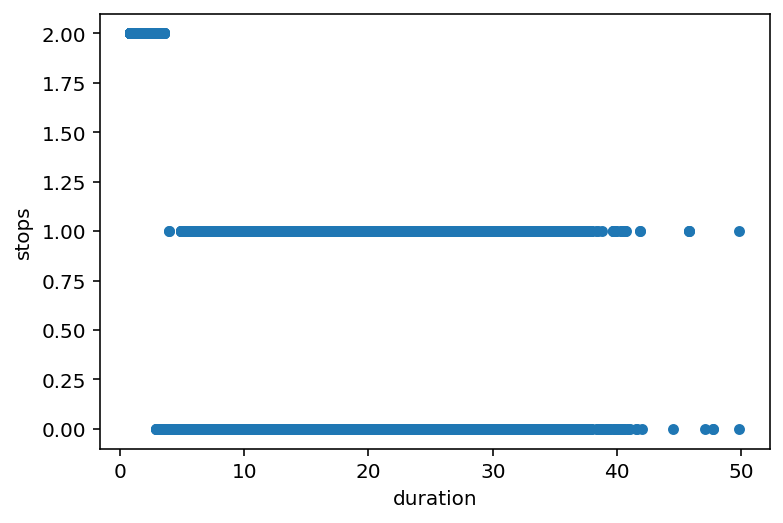

In [13]:
#Scatter
data.plot.scatter("duration", "stops")

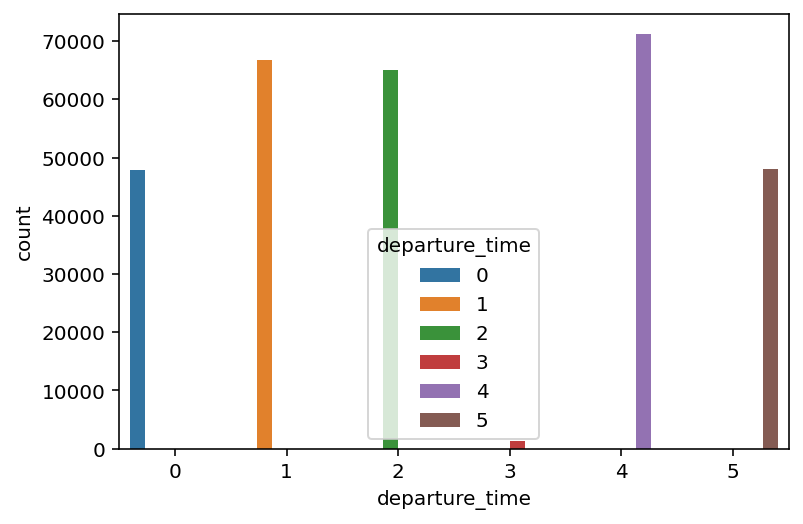

In [14]:
#Gráfico de barras da coluna Departure Time
sns.countplot(x="departure_time", hue="departure_time", data=data);


C:\Users\joao\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

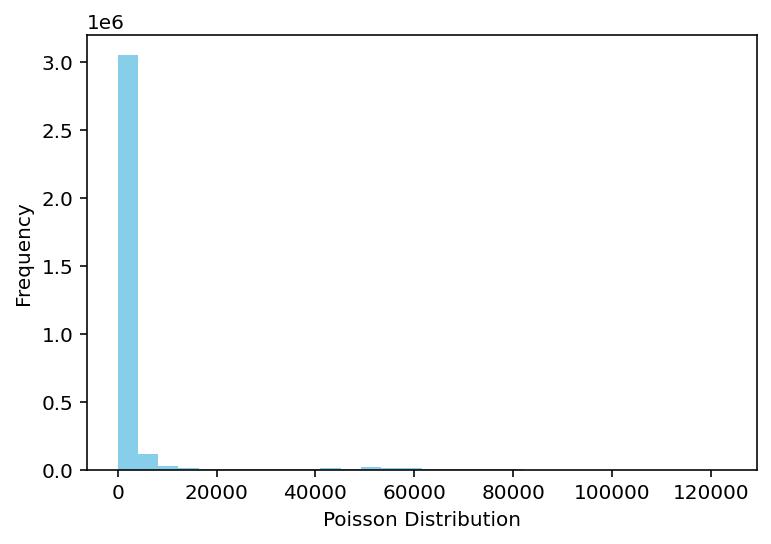

In [15]:
#Distrubuição Poisson da Dataset
ax = sns.distplot(data,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

In [16]:
#correlação
data.cov()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,3.360860,4.990082e+02,-0.091045,0.182944,-0.036422,0.120419,-0.096496,-0.151849,-0.021767,-0.265461,1.012637e+04
flight,499.008192,1.820685e+05,-7.058601,53.568534,-33.760943,49.922012,-26.982873,-51.283185,630.641082,-2.566213,2.962378e+06
source_city,-0.091045,-7.058601e+00,3.068669,-0.014406,0.002122,0.134709,-0.681294,0.000061,0.108592,-0.084769,1.826812e+02
departure_time,0.182944,5.356853e+01,-0.014406,3.077485,-0.009949,-0.141409,-0.005390,-0.043333,1.064202,-0.037988,2.322144e+03
stops,-0.036422,-3.376094e+01,0.002122,-0.009949,0.443323,0.012194,-0.014922,0.030915,-2.269128,-0.063629,-3.062145e+03
arrival_time,0.120419,4.992201e+01,0.134709,-0.141409,0.012194,3.033402,-0.113729,-0.022299,0.108715,-0.098995,1.662029e+03
destination_city,-0.096496,-2.698287e+01,-0.681294,-0.005390,-0.014922,-0.113729,3.043431,0.001295,0.021775,-0.125926,1.898692e+02
class,-0.151849,-5.128319e+01,0.000061,-0.043333,0.030915,-0.022299,0.001295,0.214455,-0.461982,0.081882,-9.858015e+03
duration,-0.021767,6.306411e+02,0.108592,1.064202,-2.269128,0.108715,0.021775,-0.461982,51.724824,-3.818998,3.333772e+04
days_left,-0.265461,-2.566213e+00,-0.084769,-0.037988,-0.063629,-0.098995,-0.125926,0.081882,-3.818998,183.900821,-2.830217e+04


In [17]:
#Covariação
data.cov()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,3.360860,4.990082e+02,-0.091045,0.182944,-0.036422,0.120419,-0.096496,-0.151849,-0.021767,-0.265461,1.012637e+04
flight,499.008192,1.820685e+05,-7.058601,53.568534,-33.760943,49.922012,-26.982873,-51.283185,630.641082,-2.566213,2.962378e+06
source_city,-0.091045,-7.058601e+00,3.068669,-0.014406,0.002122,0.134709,-0.681294,0.000061,0.108592,-0.084769,1.826812e+02
departure_time,0.182944,5.356853e+01,-0.014406,3.077485,-0.009949,-0.141409,-0.005390,-0.043333,1.064202,-0.037988,2.322144e+03
stops,-0.036422,-3.376094e+01,0.002122,-0.009949,0.443323,0.012194,-0.014922,0.030915,-2.269128,-0.063629,-3.062145e+03
arrival_time,0.120419,4.992201e+01,0.134709,-0.141409,0.012194,3.033402,-0.113729,-0.022299,0.108715,-0.098995,1.662029e+03
destination_city,-0.096496,-2.698287e+01,-0.681294,-0.005390,-0.014922,-0.113729,3.043431,0.001295,0.021775,-0.125926,1.898692e+02
class,-0.151849,-5.128319e+01,0.000061,-0.043333,0.030915,-0.022299,0.001295,0.214455,-0.461982,0.081882,-9.858015e+03
duration,-0.021767,6.306411e+02,0.108592,1.064202,-2.269128,0.108715,0.021775,-0.461982,51.724824,-3.818998,3.333772e+04
days_left,-0.265461,-2.566213e+00,-0.084769,-0.037988,-0.063629,-0.098995,-0.125926,0.081882,-3.818998,183.900821,-2.830217e+04


<AxesSubplot:>

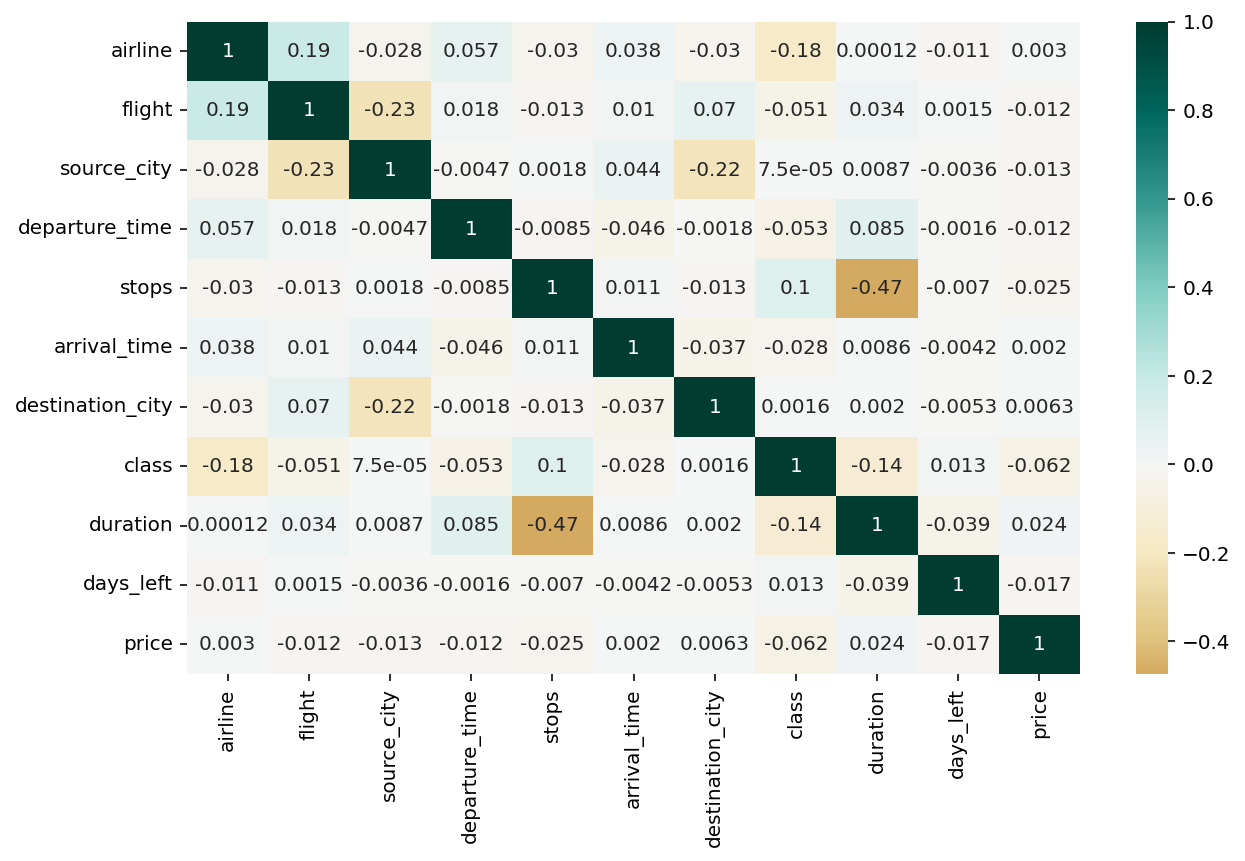

In [45]:
#heatmap
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap='BrBG', annot=True)

In [19]:
#Preparação de dados para as Árvores de Decisão
feature_cols = ["airline","flight","source_city",'departure_time',"stops","arrival_time","destination_city","class","duration","days_left","price"]
X = data[feature_cols] # variável colunas
y = data.price# Variável a estudar

In [20]:
#Preparação do caso teste e caso treino (em 70% e 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [21]:
# Criação da Árvore de Decisão
clf = DecisionTreeClassifier()
    
# Treino
clf = clf.fit(X_train,y_train)

#Previsão da resposta para o Test
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9571885480754281
Precision: 0.9556582574873604


C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


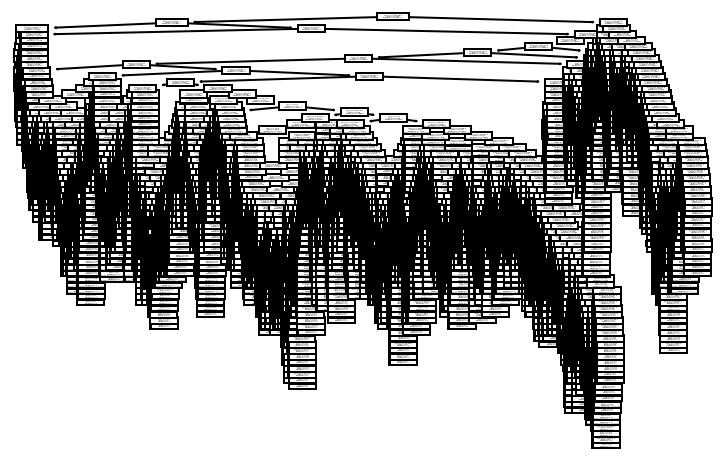

In [66]:
#Árvore de Decisão
tree.plot_tree(clf);

In [22]:
#Matriz da confusão
confusion_matrix(y_test, y_pred)

array([[92,  0,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  0, 61, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [26]:
list(le.inverse_transform([0,1]))

['Business', 'Economy']

In [27]:
list(le.inverse_transform([[0],[0]]))

C:\Users\joao\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Business', 'Business']

In [28]:
regr = LinearRegression()
regr.fit(np.array(X_train), y_train)
preds = regr.predict(np.array(X_test))



In [29]:
preds

array([ 6048., 13421.,  2836., ...,  8112.,  3090., 85148.])

In [30]:
residuals = preds - y_test


(array([  869.,  2111., 14620., 18598.,  5019.,  4179., 13374., 20837.,
        10060.,   379.]),
 array([-9.09494702e-11, -7.45785655e-11, -5.82076609e-11, -4.18367563e-11,
        -2.54658516e-11, -9.09494702e-12,  7.27595761e-12,  2.36468622e-11,
         4.00177669e-11,  5.63886715e-11,  7.27595761e-11]),
 <BarContainer object of 10 artists>)

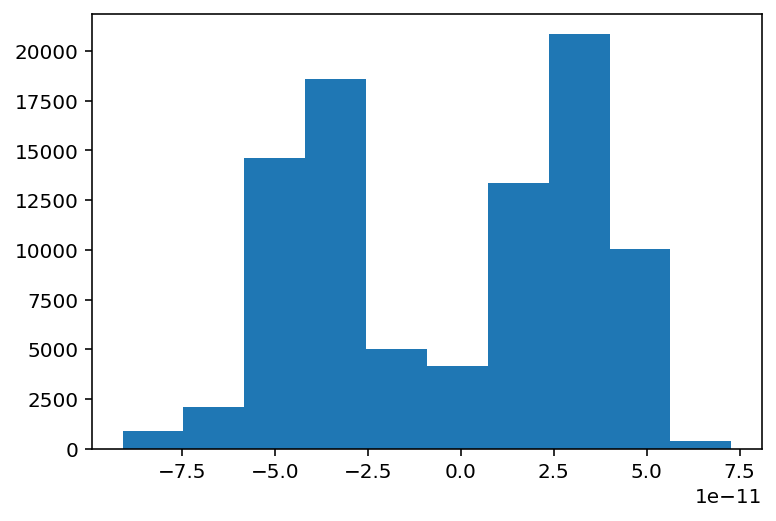

In [31]:
plt.hist(residuals)


In [33]:
#RNA
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
X_train=X_train.astype(np.uint8,errors='ignore')
y_train=y_train.astype(np.uint8,errors='ignore')
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[1598   17    1 ...    0    0    0]
 [   0 1203    0 ...    0    0    0]
 [   0    9  909 ...    0    0    0]
 ...
 [   0    0    0 ...   73    0    0]
 [   0    0    0 ...   17    3    0]
 [   0    0    0 ...  247   16    0]]


C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1616
           1       0.98      1.00      0.99      1203
           2       1.00      0.99      0.99       918
           3       1.00      1.00      1.00       716
           4       1.00      1.00      1.00       616
           5       0.99      1.00      0.99       609
           6       0.99      0.99      0.99       542
           7       1.00      1.00      1.00       863
           8       1.00      1.00      1.00       743
           9       0.81      1.00      0.90       563
          10       0.00      0.00      0.00       201
          11       0.88      0.99      0.93       542
          12       0.98      0.94      0.96      1285
          13       0.87      0.96      0.91       874
          14       0.98      0.94      0.96      1077
          15       0.85      1.00      0.92      1682
          16       0.68      0.19      0.29       407
          17       0.79    

C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[ 0  0  0 ...  0  0  0]
 [92  0  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         252       0.00      0.00      0.00       0.0
        1105       0.00      0.00      0.00      92.0
        1106       0.00      0.00      0.00       4.0
        1443       0.00      0.00      0.00      61.0
        1444       0.00      0.00      0.00       3.0
        1526       0.00      0.00      0.00       6.0
        1543       0.00      0.00      0.00     108.0
        1544       0.00      0.00      0.00      14.0
        1548       0.00      0.00      0.00      15.0
        1549       0.00      0.00      0.00       1.0
        1550       0.00      0.00      0.00      21.0
        1551       0.00      0.00      0.00      58.0
        1603       0.00      0.00      0.00      17.0
        1604       0.00      0.00      0.00      44.0
        1606       0.00      0.00

C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joao\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [23]:
#Criação do modelo
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [24]:
#Método do modelo
with open(filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

In [25]:
#Previsão do modelo com dados aleatórios
pred = Pickled_LR_Model.predict([[4,1408,4,4,2,0,7,1,2.33,1,1]])[0]

if pred <= 2000:
    print ("O voo custará menos do que 2000€. Valor da previsão:", pred)
else:
    print ("O voo custará mais do que 2000€. Valor da previsão=", pred)

O voo custará menos do que 2000€. Valor da previsão: 1830


C:\Users\joao\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
